# Brewery Problem
This notebook contains a simple exercise of Mathematic Programming taken from the course "INTRODUCCIÓN A LA PROGRAMACIÓN MATEMÁTICA" from the UNED.

## Statement
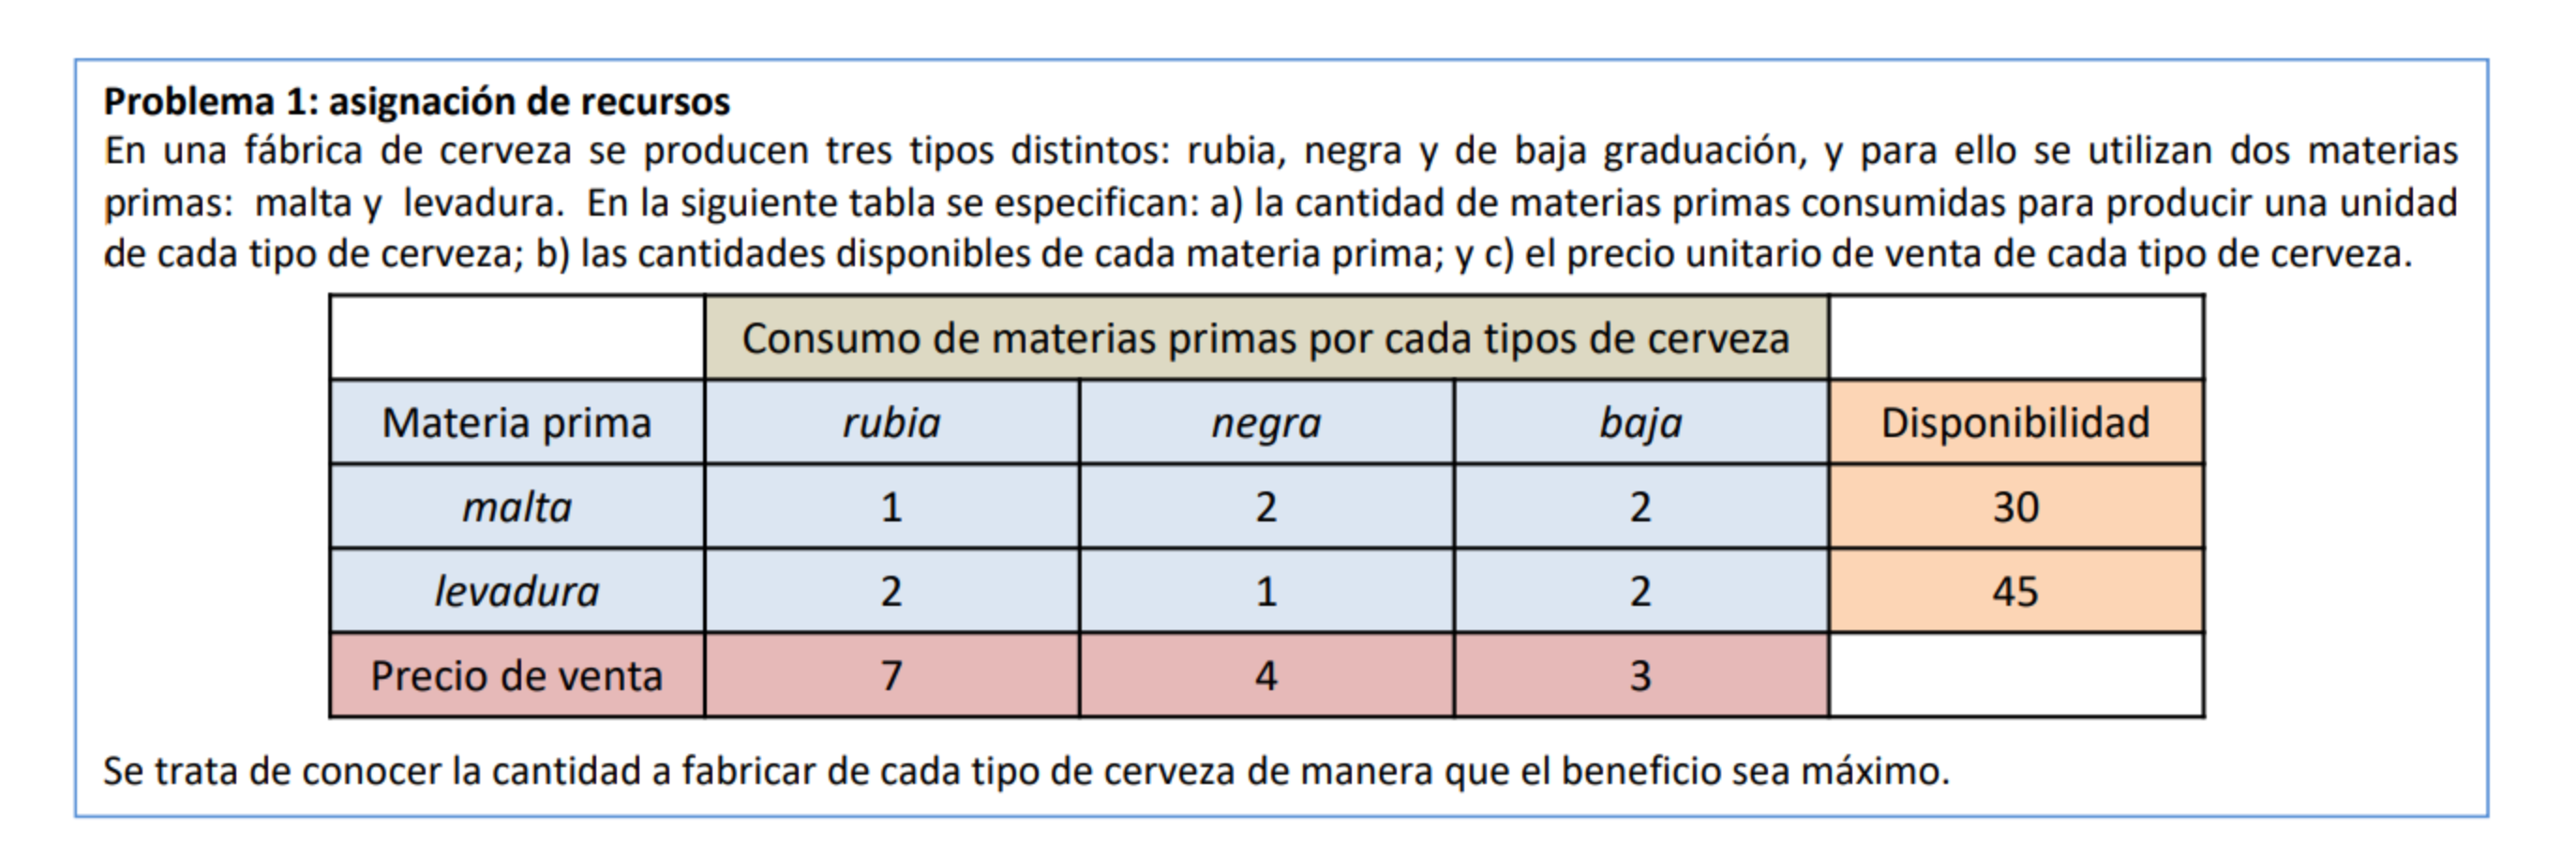


# Step 1: Define decision variables
The decision variables are:
 - Pr -> production of lager beer (cerveza rubia)
 - Pn -> production of brown ale beer (cerveza negra)
 - Pb -> production of low alcohol beer (cerveza sin)

In [1]:
from mip import *

m = Model(sense=MAXIMIZE, solver_name=CBC)
m.threads = -1 # Use all cores Available

production_r = m.add_var(name='Lager Production', var_type=INTEGER, lb=0)
production_n = m.add_var(name='Brown ale Production', var_type=INTEGER, lb=0 )
production_b = m.add_var(name='Low alcohol beer Production', var_type=INTEGER, lb=0)

# Step 2: Define the restrictions
The restrictions are given by the limited amount of resources that are available:
- 30 units of malt implies that Pr + 2Pn + 2Pb <= 30
- 45 units of yeast implies that 2Pr + Pn + 2Pb <= 45

In [2]:
malt_quantity  = 30
yeast_quantity = 45

malt_restriction = production_r + production_n*2 + production_b*2 <= malt_quantity
yeast_restriction = production_r*2 + production_n + production_b*2 <= yeast_quantity

m.add_constr(malt_restriction, name='malt_restriction')
m.add_constr(yeast_restriction, name='yeast_restriction')

# Step 3: Define the Objective Function
What does need to be optimized? In this exercise, the goal is to maximize the benefits obtained from the resources available throught the right combination of productions. Therefore, the objective function is the following:

    maximize(7Pr + 4Pn + 3Pb)

In [3]:
obj_function = maximize(production_r*7 + production_n*4 + production_b*3)

m.objective = obj_function

# Step 4: Ejecutar el optimizador y analizar resultados
The decision variables are shown along their optimal values using a DataFrame from Pandas.

In [4]:
status = m.optimize()

import pandas as pd

df_data = [{"Nombre variable": var.name, "Valor optimizado": var.x} for var in m.vars]
solution_df = pd.DataFrame(df_data)
solution_df

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Oct 24 2021 

Starting solution of the Linear programming relaxation problem using Primal Simplex

Coin0506I Presolve 2 (0) rows, 3 (0) columns and 6 (0) elements
Clp1000I sum of infeasibilities 2.84217e-14 - average 1.42109e-14, 0 fixed columns
Coin0506I Presolve 2 (0) rows, 3 (0) columns and 6 (0) elements
Clp0029I End of values pass after 3 iterations
Clp0000I Optimal - objective value 160
Clp0000I Optimal - objective value 160
Clp0000I Optimal - objective value 160
Clp0032I Optimal objective 160 - 0 iterations time 0.002, Idiot 0.00

Starting MIP optimization


,Nombre variable,Valor optimizado
0,Lager Production,20.0
1,Brown ale Production,5.0
2,Low alcohol beer Production,0.0
